In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

In [2]:
np_data= pd.read_csv('datasets/national_parks.csv')
np_data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


In [3]:
x = np_data['Year']

y = np.vstack([np_data['Badlands'], 
               np_data['GrandCanyon'], 
               np_data['BryceCanyon']])

labels = ['Badlands', 
          'GrandCanyon', 
          'BryceCanyon']

### The default color cycle
Matplotlib has a default colormap whose colors it cycles through when plotting multiple objects on the same plot. In our plot below, the colors chosen are blue, orange, green in that order

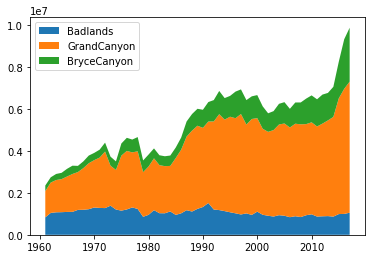

In [4]:
fig, ax = plt.subplots()

ax.stackplot(x, y, 
             labels=labels)

ax.legend(loc='upper left')

plt.show()

### Define our own colormap
We define a new set of colors to cycle through

In [5]:
colormap = ['cyan', 'magenta', 'yellow', 'grey']

#### Create the figure and axis

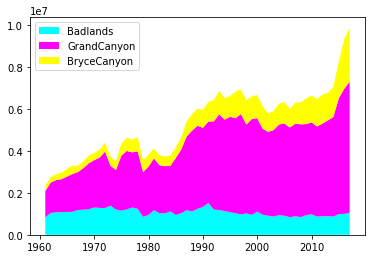

In [6]:
fig, ax = plt.subplots()

ax.set_prop_cycle('color', colormap)

ax.stackplot(x, y, 
             labels=labels)

ax.legend(loc='upper left')

plt.show()

#### The colors are picked in a cycle
Once the colormap has run out of colors, Matplotlib will go to the beginning of the colormap to pick the next color. Here, the cyan color is used twice - when the first and third objects of the stack are plotted

In [7]:
colormap = ['cyan', 'magenta']

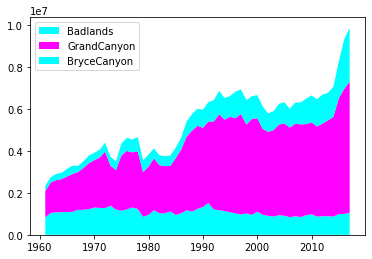

In [8]:
fig, ax = plt.subplots()

ax.set_prop_cycle('color', colormap)

ax.stackplot(x, y, 
             labels=labels)

ax.legend(loc='upper left')

plt.show()

### Matplotlib's built-in colormaps
There are a number of built-in colormaps which can also be used in our plots. These contain a range of values to choose from. The list of colormaps is here: 
https://matplotlib.org/examples/color/colormaps_reference.html

#### The Stackplot is really a list of PolyCollection objects

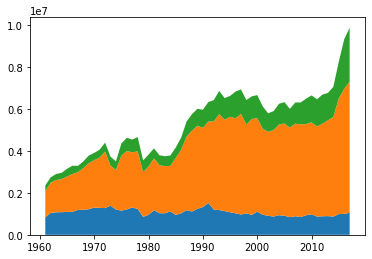

In [9]:
fig, ax = plt.subplots()

sp = ax.stackplot(x, y, 
             labels=labels)

sp

#### Use the get_cmap() function to get a distribution of colors on the colormap
* The function takes the name of the colormap and number of distinct colors required from it
* It returns a LinearSegmentedColormap object which can be used to pick a color obtained from the colormap 

In [10]:
rainbow_cmap = plt.get_cmap('rainbow', len(sp))
rainbow_cmap

#### We set colors for each PolyCollection in the stackplot
For this, we use the ColorMap we just created

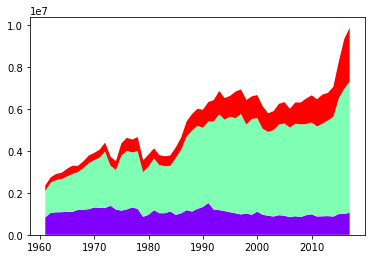

In [11]:
fig, ax = plt.subplots()

sp = ax.stackplot(x, y, 
             labels=labels)

for i in range(len(sp)):
    sp[i].set_facecolor(rainbow_cmap(i))

#### The stackplot contains the rainbow colors
Remember VIBGYOR. The first color should be violet, the middle one green and the 3rd one red

#### The rainbow_cmap only contains 3 distinct colors
Though we can get colors for higher index values, they're all the same as the 3rd color

In [12]:
for i in range(5):
    print(rainbow_cmap(i))

(0.5, 0.0, 1.0, 1.0)
(0.5, 1.0, 0.7071067811865476, 1.0)
(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)
(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)
(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)


### Some Matplotlib plots use colormaps by default
For example, a scatterplot or pcolormesh. Stackplots and lines don't support it by default - which is why we explicity had to set the colors for each PolyCollection in the scatterplot

#### Create a Scatterplot with 100 markers
For simplicity, we just plot a straight line

In [13]:
x = np.arange(100)

y = x

#### Plot the scatterplot by specifying the sequence of colors
c is a sequence which will be used to get evenly spaced values from the colormap. So the distribution of colors from the colormap will reflect the distribution of y. 

Here we don't specify a colormap, so the default one will be used.

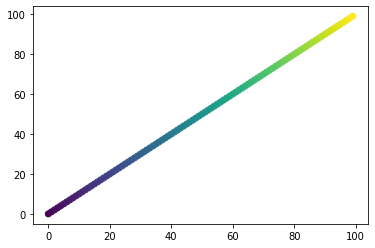

In [14]:
fig, ax = plt.subplots()

ax.scatter(x, y, 
           c=y)

plt.show()

#### Specify the colormap to use
We use the rainbow colormap again

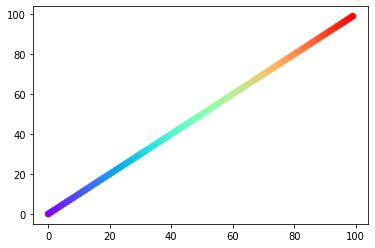

In [15]:
fig, ax = plt.subplots()

ax.scatter(x, y, 
           c=y, 
           cmap='rainbow')

plt.show()

### Colormap normalization
By default, the color distribution in your colormap is linear. However, if the relationship between the X and Y values in your distribution is not linear, then your plot may not contain a good distribution of colors picked from the colormap.

This is where the colors need to be Normalized to fit your distribution.

In [16]:
import matplotlib.colors as colors

#### Define a non-linear distribution
Here y = 2<sup>x</sup>

In [17]:
x = np.arange(1, 10)
y = np.exp2(x)

#### Plotting the distribution shows very similar colors for the initial values
This is because the Y-values are very closely bunched up for the lower values, and increases exponentially

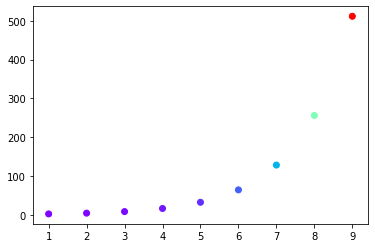

In [18]:
fig, ax = plt.subplots()

ax.scatter(x, y, 
           c=y, 
           cmap='rainbow')

plt.show()

#### Specify a logarithmic distribution for the colormap
Since the relationship between y and x is exponential, the color distribution should be logarithmic. This will ensure that the color variation will be widely distributed at lower values and will vary more slowly for higher values - the inverse of our distribution.

We notice that the colors for the lower x values are now more varied

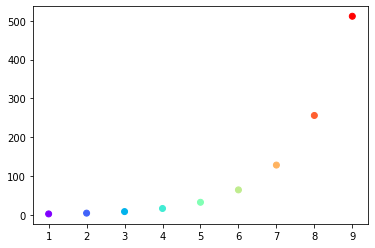

In [19]:
fig, ax = plt.subplots()

ax.scatter(x, y, 
           c=y,
           cmap='rainbow',
           norm=colors.LogNorm())

plt.show()

#### To emphasize this, we create a larger distribution with 100 values

In [20]:
x = np.arange(1, 100)
y = np.exp2(x)

#### Nearly all the values seem to have the same violent color
We also use a logarithmic scale on the Y axis, so the graph looks linear

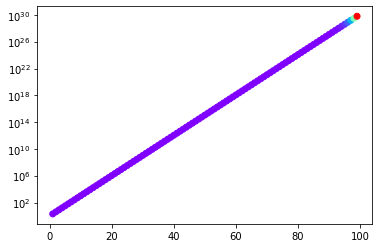

In [21]:
fig, ax = plt.subplots()

ax.scatter(x, y, 
           c=y, 
           cmap='rainbow')

ax.set_yscale('log')

plt.show()

#### Normalizing the colormap results in a better color distribution
Using log normalization for an exponential relationship pretty much creates a linear colormap for our distribution

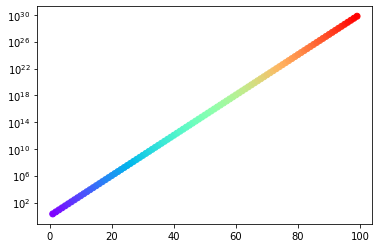

In [22]:
fig, ax = plt.subplots()

ax.scatter(x, y, 
           c=y, 
           cmap='rainbow',
           norm=colors.LogNorm())

ax.set_yscale('log')

plt.show()

#### Other normalizing functions available
Other than LogNorm(), Matplotlib also gives us:
* <b>SymLogNorm() </b> is meant for logarithmic scaling to be applied even when negative values are present in the distribution
* <b>PowerNorm() </b> lets you define a power relationship between x and y such that y = x<sup>&gamma;</sup> where you will specify PowerNorm(gamma=&gamma;)